In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine1 = pd.read_csv("winemag-data_first150k.csv")

In [3]:
wine1.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [4]:
# Inspecting total number of rows, data types of each attribute, # of null values
# Scikit-learn SimpleImputer fill in null values with mean, median, or mode
# If missing data is continuous and normally distributed, use mean imputation
# If the missing data is categorical, use mode imputation
wine1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [5]:
# Look at # number of rows, mean, std, min, max, 25, 50, 75 quantile
wine1.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


array([[<Axes: xlabel='Unnamed: 0', ylabel='Unnamed: 0'>,
        <Axes: xlabel='points', ylabel='Unnamed: 0'>,
        <Axes: xlabel='price', ylabel='Unnamed: 0'>],
       [<Axes: xlabel='Unnamed: 0', ylabel='points'>,
        <Axes: xlabel='points', ylabel='points'>,
        <Axes: xlabel='price', ylabel='points'>],
       [<Axes: xlabel='Unnamed: 0', ylabel='price'>,
        <Axes: xlabel='points', ylabel='price'>,
        <Axes: xlabel='price', ylabel='price'>]], dtype=object)

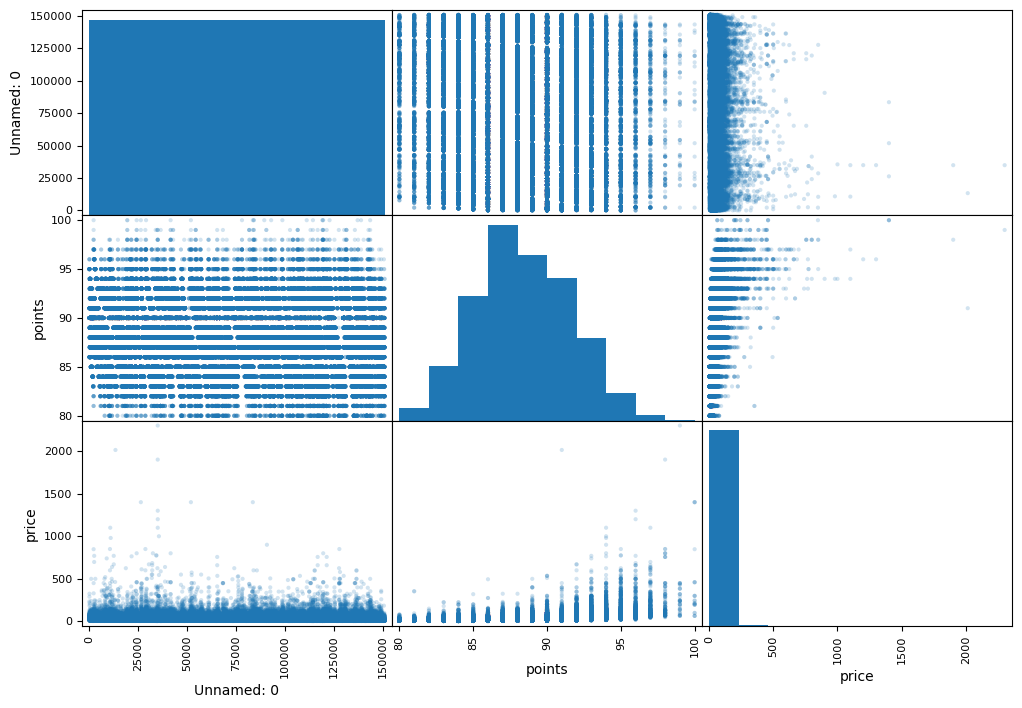

In [6]:
# Create correlation matrix and make scatter plots
# This function plots every numerical attribute against every other numerical attribute
# Visualize the correlation between features, shape of the features through histogram plots
pd.plotting.scatter_matrix(wine1, figsize=(12,8), alpha=0.2)

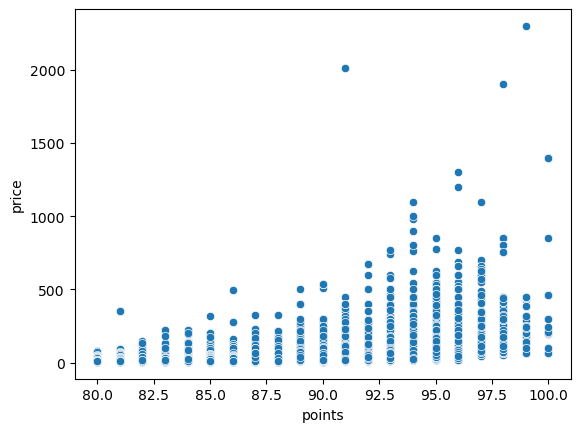

In [7]:
# Visualize the 2 numeric variables
sns.scatterplot(x="points",y="price",data=wine1)
plt.show()

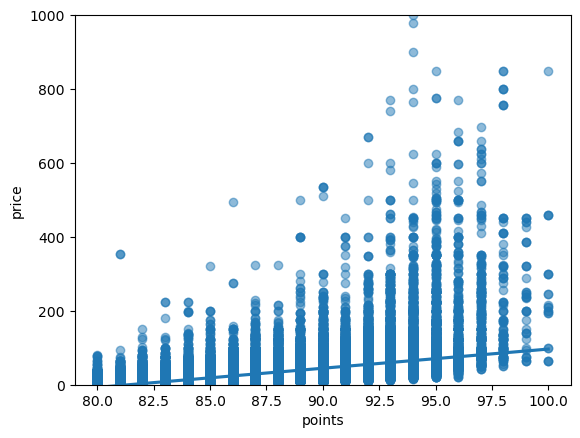

In [8]:
# Add a trend line on the scatter plot
sns.regplot(x="points",y="price",data=wine1,ci=None,scatter_kws={'alpha':0.5})
plt.ylim(0,1000)
plt.show()    

In [9]:
# Check missing values
print(wine1.isna().sum().sort_values())

Unnamed: 0         0
description        0
points             0
variety            0
winery             0
country            5
province           5
price          13695
region_1       25060
designation    45735
region_2       89977
dtype: int64


In [10]:
# Drop all NAs in price and points in wine1 dataset
wine1_2 = wine1.dropna(subset=["country","province","price"])
print(wine1_2.isna().sum().sort_values())

Unnamed: 0         0
country            0
description        0
points             0
price              0
province           0
variety            0
winery             0
region_1       22837
designation    42311
region_2       76526
dtype: int64


In [11]:
# Fitting a linear regression model
from statsmodels.formula.api import ols
mdl_wine1 = ols("price ~ points",data=wine1)
mdl_wine1 = mdl_wine1.fit()
print(mdl_wine1.params)

# Intercept = -422.02 slope = 5.184
# Equation price = 5.184 * points - 422.02
# For each additional points, can expect price to increase 5.18

Intercept   -422.021462
points         5.184688
dtype: float64


In [12]:
# Reading the second wine dataset
wine2 = pd.read_csv("winemag-data-130k-v2.csv")

In [13]:
# Check missing values in wine2 dataset
print(wine2.isna().sum().sort_values())

Unnamed: 0                   0
description                  0
points                       0
title                        0
winery                       0
variety                      1
country                     63
province                    63
price                     8996
region_1                 21247
taster_name              26244
taster_twitter_handle    31213
designation              37465
region_2                 79460
dtype: int64


In [14]:
# Drop NAs in price and points in wine2 dataset
wine2_2 = wine2.dropna(subset=["variety","country","province","price"])
print(wine2_2.isna().sum().sort_values())

Unnamed: 0                   0
country                      0
description                  0
points                       0
price                        0
province                     0
title                        0
variety                      0
winery                       0
region_1                 19515
taster_name              24495
taster_twitter_handle    29415
designation              34767
region_2                 70623
dtype: int64


In [15]:
wine2_2.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature


In [16]:
wine2_3 = pd.DataFrame(wine2_2)
wine2_3.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature


In [17]:
wine2_4 = wine2_3[['points','price']]

In [18]:
wine2_4.head(10)

,points,price
1,87,15.0
2,87,14.0
3,87,13.0
4,87,65.0
5,87,15.0
6,87,16.0
7,87,24.0
8,87,12.0
9,87,27.0
10,87,19.0


In [19]:
wine2_4.describe()

,points,price
count,120915.000000,120915.000000
mean,88.421726,35.368796
std,3.044954,41.031188
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [20]:
wine2_4.rename(columns={'price': 'orgprice'}, inplace=True)
wine2_4.head(10)

/var/folders/1z/qg6jzxj504q3ny64nffcct9c0000gn/T/ipykernel_57756/670550553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine2_4.rename(columns={'price': 'orgprice'}, inplace=True)


,points,orgprice
1,87,15.0
2,87,14.0
3,87,13.0
4,87,65.0
5,87,15.0
6,87,16.0
7,87,24.0
8,87,12.0
9,87,27.0
10,87,19.0


In [21]:
# Use mdl_wine1 to predict price for wine2 points
price = mdl_wine1.predict(wine2_4)

In [22]:
wine2_4.head(10)

,points,orgprice
1,87,15.0
2,87,14.0
3,87,13.0
4,87,65.0
5,87,15.0
6,87,16.0
7,87,24.0
8,87,12.0
9,87,27.0
10,87,19.0


In [23]:
# Add the predicted price into the dataframe
wine2_4 = wine2_4.assign(predprice = price)

In [24]:
wine2_4.head(10)

,points,orgprice,predprice
1,87,15.0,29.046371
2,87,14.0,29.046371
3,87,13.0,29.046371
4,87,65.0,29.046371
5,87,15.0,29.046371
6,87,16.0,29.046371
7,87,24.0,29.046371
8,87,12.0,29.046371
9,87,27.0,29.046371
10,87,19.0,29.046371


In [25]:
wine2_4.describe()

,points,orgprice,predprice
count,120915.000000,120915.000000,120915.000000
mean,88.421726,35.368796,36.417576
std,3.044954,41.031188,15.787137
min,80.000000,4.000000,-7.246443
25%,86.000000,17.000000,23.861683
50%,88.000000,25.000000,34.231059
75%,91.000000,42.000000,49.785122
max,100.000000,3300.000000,96.447311


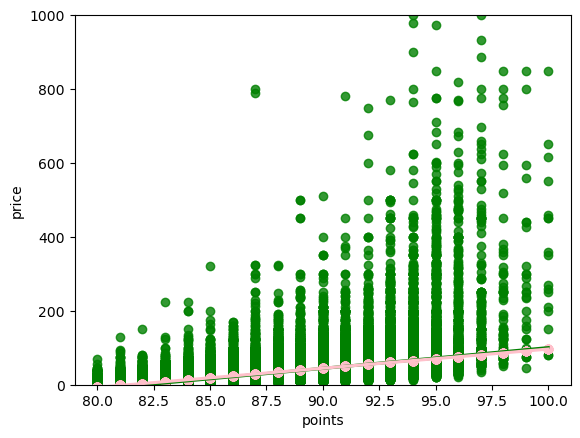

In [26]:
fig = plt.figure()
sns.regplot(x="points",y="orgprice",data=wine2_4, color="green")
sns.regplot(x="points",y="predprice",data=wine2_4,color="pink")
plt.ylim(0,1000)
plt.ylabel("price")
plt.show()

In [27]:
# Model performance: r-squared

mdl_wine1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                 3.680e+04
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        00:04:14   Log-Likelihood:            -6.7143e+05
No. Observations:              137235   AIC:                         1.343e+06
Df Residuals:                  137233   BIC:                         1.343e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -422.0215      2.374   -177.760      0.000    -426.675    -417.368
points         5.1847      0.027    191.845      0.000       5.132       5.238
==============================================================================
Omnibus:                   258940.875   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1555067644.711
Skew:                          14.005   Prob(JB):                         0.00
Kurtosis:                     523.739   Cond. No.                     2.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# r-squared is 0.211
# The proportion of the variance in the response variable that is predictable from the explanatory variable
# Looks like from this result, only 22% of variance in price is explained by points! 
# Other feature(s) at play!

In [29]:
# Model performance: Residual standard error (RSE)

mse = mdl_wine1.mse_resid
print('mse: ',mse) # squared residual standard error
rse = np.sqrt(mse)
print('rse: ',rse)

# RSE: measure of the typical size of the residuals, how much the predictions are typically wrong
# Assessing model's performance by taking mean of residual sum of squares (MSE, mean square error)

# mse = 1040.33 rse = 32.25
# rse of 32.25 means that the difference between the predicted value of price and actual price is typically about 32.25
# The model has an average error for price of around $32 per point

mse:  1040.3304432484529
rse:  32.25415389137425


In [30]:
# Model performance: Residual standard error 
# An alternate way of calculating RSE

# For each observation, calculate the vertical distance between the observed value and the predicted value 
wine2_4['residual'] = wine2_4['predprice'] - wine2_4['orgprice']
wine2_4['residual2'] = wine2_4['residual']**2
deg_freedom = len(wine2_4.index) - 2

In [31]:
rse_calc = np.sqrt(sum(wine2_4['residual2'])/deg_freedom)
print("rse_calc: ", rse_calc)

rse_calc:  37.34578563664311
